## Loan Status Prediction

- Main aim of this dataset to predict which of the customers will have their loan dataset
- Using machine learning model to predict it
- Dataset is Load prediction

In [122]:
##Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE


In [67]:

train_data = pd.read_csv('train.csv', index_col=None)
test_data = pd.read_csv('test.csv', index_col=None)

LoanData = pd.concat([train_data, test_data], axis=0, sort=False)

# Reset index
LoanData.reset_index(drop=True, inplace=True)

LoanData.to_csv('LoanData.csv', index=False)

In [68]:
data=pd.read_csv('LoanData.csv',index_col=None)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


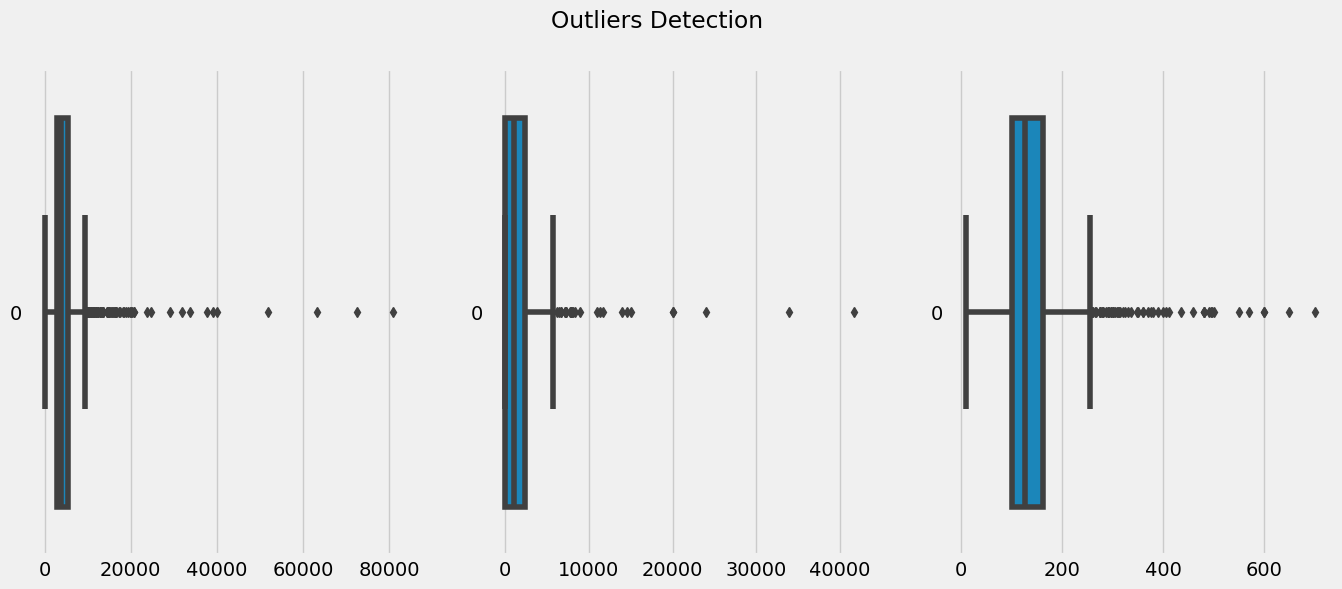

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'],orient='h')

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'],orient='h')

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'],orient='h')

plt.suptitle("Outliers Detection")
plt.show()

In [8]:
data.describe(include = 'object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001099,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


In [69]:
#Split into Quantitaive and Qualitive
def Quan_Qual_data(data):
    Quan=[]
    Qual=[]
    for columns in data.columns:
        if data[columns].dtypes=='O':
            Qual.append(columns)
        else:
            Quan.append(columns)
    return Quan,Qual

In [70]:
Quan,Qual=Quan_Qual_data(data)

In [11]:
#To check the null values
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [71]:
#Null values present in both categorical and numerical value
def replace_null(data):
    for column in data.columns:
        if column != 'Loan_Status':
            if data[column].dtypes == 'O':
                data[column].fillna(data[column].mode()[0], inplace=True)
            else:
                data[column].fillna(data[column].median(), inplace=True)

                        

In [72]:
replace_null(data)

In [19]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

- Target variable (Loan_Status) is an important step in the data preprocessing phase. Since your target variable is categorical, and it seems to be imbalanced with more 'Y' (422 instances) than 'N' (192 instances),
- After Univariate/Bivariate/Distribution/Visualization we can predict the target variable Loan_Status using model

In [73]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [66]:
data['Loan_Status_Y'].value_counts()

0    559
1    422
Name: Loan_Status_Y, dtype: int64

## Univariate

In [25]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [26]:
descriptive=Univariate(data,Quan)

In [27]:
descriptive

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Mean,5179.8,1601.92,142.057,342.565,0.849134
Median,3800,1110,126,360,1
Mode,2500,0,126,360,1
Q1:25%,2875,0,101,360,1
Q2:50%,3800,1110,126,360,1
Q3:75%,5516,2365,160,360,1
99%,25671,11034.4,482,480,1
Q4:100%,81000,41667,700,480,1
IQR,2641,2365,59,0,0
1.5rule,3961.5,3547.5,88.5,0,0


In [28]:
#Check the outliers
def check_outliers(Quan):
        Lesser = []
        Greater = []

        for column_name in Quan:
            if descriptive[column_name]['Min'] < descriptive[column_name]['Lesser']:
                Lesser.append(column_name)
            if descriptive[column_name]['Max'] > descriptive[column_name]['Greater']:
                Greater.append(column_name)
        return Lesser, Greater

In [29]:
Lesser,Greater=check_outliers(Quan)

In [30]:
Lesser

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [31]:
Greater

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [32]:
# Replace the Outliers
def replace_outliers(Lesser, Greater):
    for column_name in Lesser:
        data[column_name][data[column_name] < descriptive[column_name]['Lesser']] = descriptive[column_name]['Lesser']

    for column_name in Greater:
        data[column_name][data[column_name] > descriptive[column_name]['Greater']] = descriptive[column_name]['Greater']

    return descriptive

In [33]:
descriptive=replace_outliers(Lesser,Greater)

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [34]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [35]:
descriptive=Univariate(data,Quan)

In [36]:
descriptive

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Mean,4466.31,1423.64,134.776,360,1
Median,3800,1110,126,360,1
Mode,9477.5,0,248.5,360,1
Q1:25%,2875,0,101,360,1
Q2:50%,3800,1110,126,360,1
Q3:75%,5516,2365,160,360,1
99%,9477.5,5912.5,248.5,360,1
Q4:100%,9477.5,5912.5,248.5,360,1
IQR,2641,2365,59,0,0
1.5rule,3961.5,3547.5,88.5,0,0


In [45]:
#Frequency Dataframe
def freq_tables(data):
    categorical_columns = data.select_dtypes(include=['object']).columns

    all_freq_tables = {}
    for column in categorical_columns:
        freq_table = pd.DataFrame(columns=['Unique_value', 'Frequency', 'Relative_Freq', 'Cumulative_Frequency'])
        freq_table['Unique_value'] = data[column].value_counts().sort_index(ascending=False)
        freq_table['Frequency'] = data[column].value_counts().sort_values(ascending=False)
        freq_table['Relative_Freq'] = freq_table['Frequency'] / len(data)
        freq_table['Cumulative_Frequency'] = freq_table['Relative_Freq'].cumsum()

        all_freq_tables[column] = freq_table

    return all_freq_tables

In [46]:
result_df = freq_tables(data)
result_df

{'Gender':         Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Male             799        799       0.814475              0.814475
 Female           182        182       0.185525              1.000000,
 'Married':      Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Yes           634        634       0.646279              0.646279
 No            347        347       0.353721              1.000000,
 'Dependents':     Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 3+            91         91       0.092762              0.092762
 2            160        160       0.163099              0.255861
 1            160        160       0.163099              0.418960
 0            570        570       0.581040              1.000000,
 'Education':               Unique_value  Frequency  Relative_Freq  Cumulative_Frequency
 Not Graduate           218        218       0.222222              0.222222
 Graduate               763        763       0.777778   

In [48]:
result_dict = {
    'Gender': pd.DataFrame({
        'Unique_value': ['Male', 'Female'],
        'Frequency': [799, 182],
        'Relative_Freq': [0.814475, 0.185525],
        'Cumulative_Frequency': [0.814475, 1.000000]
    }),
    'Married': pd.DataFrame({
        'Unique_value': ['Yes', 'No'],
        'Frequency': [634, 347],
        'Relative_Freq': [0.646279, 0.353721],
        'Cumulative_Frequency': [0.646279, 1.000000]
    }),
    'Dependents': pd.DataFrame({
        'Unique_value': ['3+', '2', '1', '0'],
        'Frequency': [91, 160, 160, 570],
        'Relative_Freq': [0.092762, 0.163099, 0.163099, 0.581040],
        'Cumulative_Frequency': [0.092762, 0.255861, 0.418960, 1.000000]
    }),
    'Education': pd.DataFrame({
        'Unique_value': ['Not Graduate', 'Graduate'],
        'Frequency': [218, 763],
        'Relative_Freq': [0.222222, 0.777778],
        'Cumulative_Frequency': [0.222222, 1.000000]
    }),
    'Self_Employed': pd.DataFrame({
        'Unique_value': ['Yes', 'No'],
        'Frequency': [119, 862],
        'Relative_Freq': [0.121305, 0.878695],
        'Cumulative_Frequency': [0.121305, 1.000000]
    }),
    'Property_Area': pd.DataFrame({
        'Unique_value': ['Urban', 'Semiurban', 'Rural'],
        'Frequency': [342, 349, 290],
        'Relative_Freq': [0.348624, 0.355759, 0.295617],
        'Cumulative_Frequency': [0.348624, 0.704383, 1.000000]
    }),
    'Loan_Status': pd.DataFrame({
        'Unique_value': ['Y', 'N'],
        'Frequency': [422, 192],
        'Relative_Freq': [0.430173, 0.195719],
        'Cumulative_Frequency': [0.430173, 0.625892]
    })
}

# Convert the dictionary of DataFrames into a single DataFrame
result_df = pd.concat(result_dict.values(), keys=result_dict.keys(), names=['Feature'])

# Reset the index for a cleaner DataFrame
result_df.reset_index(inplace=True)

# Print the final DataFrame
result_df = result_df.drop('level_1', axis=1)
result_df


,Feature,Unique_value,Frequency,Relative_Freq,Cumulative_Frequency
0,Gender,Male,799,0.814475,0.814475
1,Gender,Female,182,0.185525,1.000000
2,Married,Yes,634,0.646279,0.646279
3,Married,No,347,0.353721,1.000000
4,Dependents,3+,91,0.092762,0.092762
5,Dependents,2,160,0.163099,0.255861
6,Dependents,1,160,0.163099,0.418960
7,Dependents,0,570,0.581040,1.000000
8,Education,Not Graduate,218,0.222222,0.222222
9,Education,Graduate,763,0.777778,1.000000


## Distribution and Standard Normal Distribution

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.

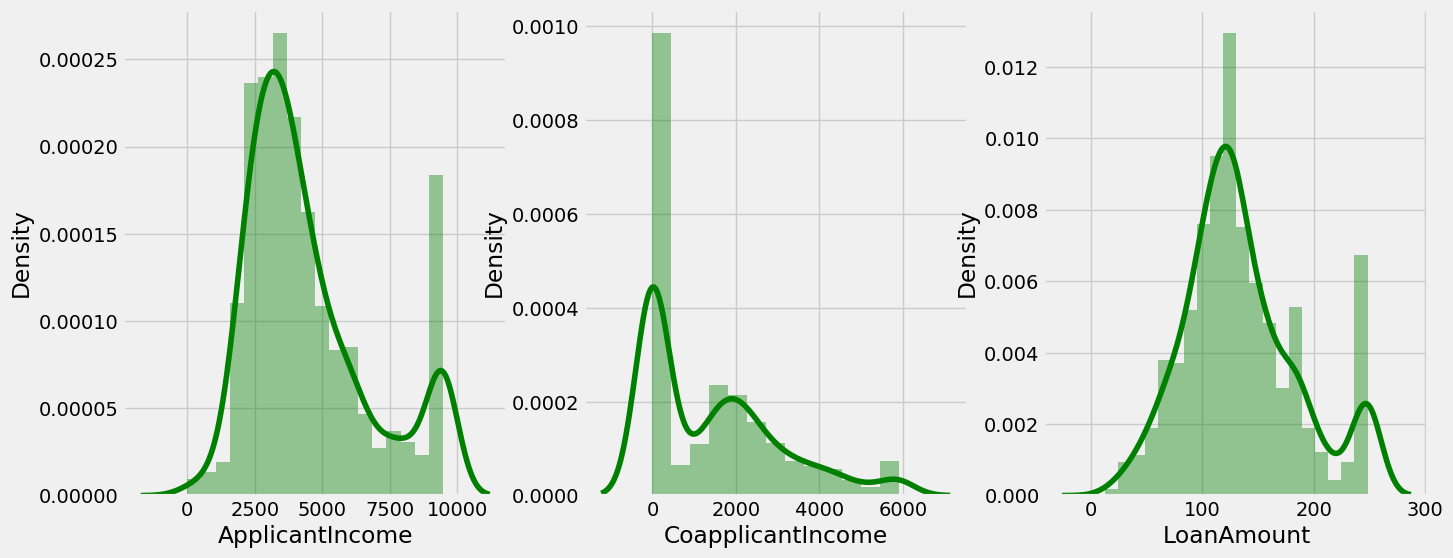

In [49]:
plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

In [50]:
## Standard Normal Distribution

def std_graph(data):
    # Calculate mean and standard deviation for each feature
    mean_values = data.mean()
    std_values = data.std()

    # Create subplots for each feature
    num_features = len(data.columns)
    fig, axes = plt.subplots(nrows=num_features, figsize=(8, 4 * num_features))

    # Iterate through each feature and plot its z-scores
    for i, feature in enumerate(data.columns):
        values = list(data[feature])
        z_scores = [(X - mean_values[feature]) / std_values[feature] for X in values]

        sns.distplot(z_scores, kde=True, ax=axes[i])
        axes[i].set_title(f'{feature} Z-Score Distribution')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda

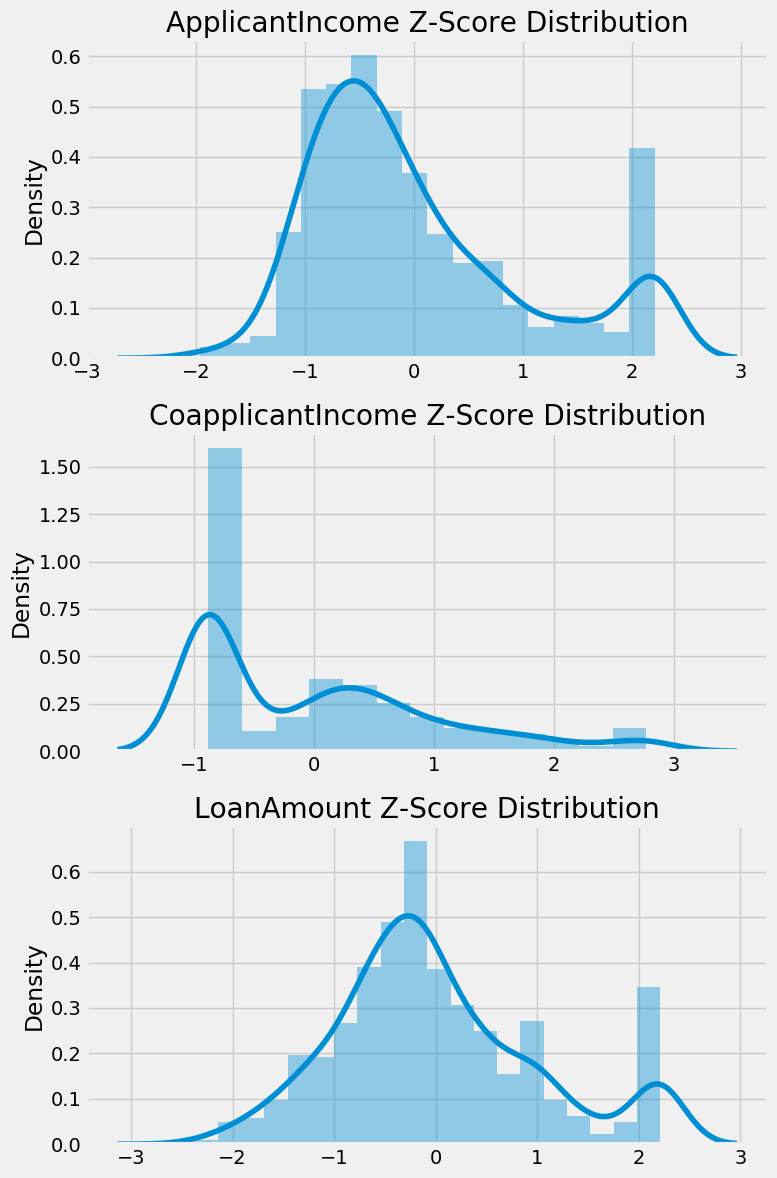

In [51]:
std_graph(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

## Bivariate

In [53]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,5.145211e+06,-8.572448e+05,61506.964236
CoapplicantIncome,-8.572448e+05,2.622315e+06,20208.950363
LoanAmount,6.150696e+04,2.020895e+04,2645.941492


- covariance values are influenced by the scale of the variables, and it can be challenging to compare covariances directly. If you want a standardized measure that is easier to compare, you may consider the correlation coefficient, which normalizes the covariance by the standard deviations of the variables.

In [54]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.233378,0.527148
CoapplicantIncome,-0.233378,1.000000,0.242611
LoanAmount,0.527148,0.242611,1.000000



Its represents the correlation coefficients between different variables (ApplicantIncome, CoapplicantIncome, and LoanAmount). Correlation measures the strength and direction of a linear relationship between two variables:

ApplicantIncome and CoapplicantIncome: The correlation coefficient is approximately -0.233378. This suggests a weak negative correlation between ApplicantIncome and CoapplicantIncome. In other words, as one of these variables increases, the other tends to decrease slightly.

ApplicantIncome and LoanAmount: The correlation coefficient is approximately 0.527148. This indicates a moderate positive correlation between ApplicantIncome and LoanAmount. As ApplicantIncome increases, LoanAmount tends to increase as well.

CoapplicantIncome and LoanAmount: The correlation coefficient is approximately 0.242611. Similar to the ApplicantIncome-LoanAmount relationship, there is a weak positive correlation between CoapplicantIncome and LoanAmount. As CoapplicantIncome increases, LoanAmount tends to increase slightly.

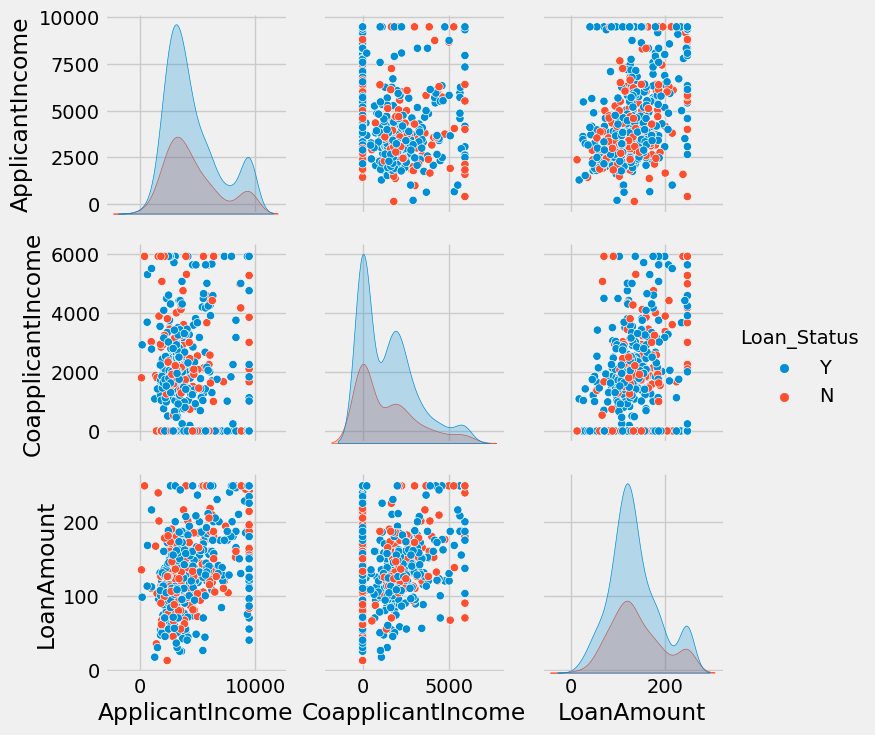

In [55]:
# visualize the pair to check multicollinearity

sns.pairplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount'] + ['Loan_Status']], hue='Loan_Status')
plt.show()


In [58]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(data_frame):
    variables = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data


In [59]:
calc_vif(data[Quan])

,Variable,VIF
0,ApplicantIncome,1.713985
1,CoapplicantIncome,1.315101
2,LoanAmount,1.721988
3,Loan_Amount_Term,0.000000
4,Credit_History,0.000000


## Chi Square Test when Input and target is categorical

In [75]:
from scipy.stats import chi2_contingency

categorical_features = ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['Loan_Status'])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check p-value
    print(f"\nChi-square test for {feature}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association.")
    else:
        print("Fail to reject the null hypothesis. No significant association.")



Chi-square test for Dependents:
Chi2 value: 3.1513990012324227
P-value: 0.3688663081366005
Fail to reject the null hypothesis. No significant association.

Chi-square test for Education:
Chi2 value: 4.091490413303621
P-value: 0.04309962129357355
Reject the null hypothesis. There is a significant association.

Chi-square test for Gender:
Chi2 value: 0.11087854691241235
P-value: 0.7391461310869638
Fail to reject the null hypothesis. No significant association.

Chi-square test for Married:
Chi2 value: 4.73187557933362
P-value: 0.029608580862582116
Reject the null hypothesis. There is a significant association.

Chi-square test for Property_Area:
Chi2 value: 12.297623130485675
P-value: 0.0021360187811644937
Reject the null hypothesis. There is a significant association.

Chi-square test for Self_Employed:
Chi2 value: 0.0
P-value: 1.0
Fail to reject the null hypothesis. No significant association.


significant difference between Education, Married, and Property_Area variables, while no significant associations were found for Dependents, Gender, and Self_Employed variables.

## Ttest or Anova test when input has numerical and Target has Categorical or Input has categoricl and Target has numerical

In [76]:
## Input has numerical and Target has Categorical

from scipy.stats import ttest_ind

# Split the data into two groups based on Loan_Status
loan_status_yes = data[data['Loan_Status'] == 'Y']
loan_status_no = data[data['Loan_Status'] == 'N']

# Perform t-test for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    t_stat, p_value = ttest_ind(loan_status_yes[feature], loan_status_no[feature])
    
    print(f"\nT-test for {feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



T-test for ApplicantIncome:
T-statistic: -0.11650844828724542
P-value: 0.907287812130518
Fail to reject the null hypothesis. No significant difference.

T-test for CoapplicantIncome:
T-statistic: -1.4667846999020244
P-value: 0.14294828684286368
Fail to reject the null hypothesis. No significant difference.

T-test for LoanAmount:
T-statistic: -0.8134378118723684
P-value: 0.4162834370578369
Fail to reject the null hypothesis. No significant difference.


In [78]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


- there is no strong evidence of a significant difference between the groups with different Loan_Status values for these numerical features.

In [81]:
data = data.drop('Loan_ID', axis=1)


In [85]:
data['Loan_Status'].fillna(value='Other', inplace=True)
data

In [87]:
data['Loan_Status'].value_counts()

Y        422
Other    367
N        192
Name: Loan_Status, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [89]:
data['Loan_Status'].value_counts()

2    422
1    367
0    192
Name: Loan_Status, dtype: int64

In [91]:
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    groups = [data[data['Loan_Status'] == status][feature] for status in data['Loan_Status'].unique()]
    
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\nANOVA for {feature}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



ANOVA for ApplicantIncome:
F-statistic: 1.2742349056492142
P-value: 0.2801086864750778
Fail to reject the null hypothesis. No significant difference.

ANOVA for CoapplicantIncome:
F-statistic: 1.286069341076744
P-value: 0.27682185010181093
Fail to reject the null hypothesis. No significant difference.

ANOVA for LoanAmount:
F-statistic: 2.253454209561315
P-value: 0.10558089737209972
Fail to reject the null hypothesis. No significant difference.


- no significant difference in the means between the groups with different Loan_Status values ('Y' and 'N' and 'N/A)

## Define the function for feature selection,standardisation,splitting and model

In [137]:
def selectkbest(indep_X, dep_Y, n):
    test = SelectKBest(score_func=chi2, k=n)
    fit1 = test.fit(indep_X, dep_Y)
    selectk_features = fit1.transform(indep_X)
    return selectk_features

def split_scalar(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

def cm_prediction(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return classifier, Accuracy, report, X_test, y_test, cm

def logistic(X_train, y_train, X_test, y_test):
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def svm_linear(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def svm_NL(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def Navie(X_train, y_train, X_test, y_test):
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def knn(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def Decision(X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def random(X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm

def selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    dataframe = pd.DataFrame(index=['ChiSquare'],
                             columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    for number, idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex] = acclog[number]       
        dataframe['SVMl'][idex] = accsvml[number]
        dataframe['SVMnl'][idex] = accsvmnl[number]
        dataframe['KNN'][idex] = accknn[number]
        dataframe['Navie'][idex] = accnav[number]
        dataframe['Decision'][idex] = accdes[number]
        dataframe['Random'][idex] = accrf[number]
    return dataframe

In [94]:
data=pd.get_dummies(data,drop_first=True)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
ApplicantIncome            981 non-null int64
CoapplicantIncome          981 non-null float64
LoanAmount                 981 non-null float64
Loan_Amount_Term           981 non-null float64
Credit_History             981 non-null float64
Loan_Status                981 non-null int32
Gender_Male                981 non-null uint8
Married_Yes                981 non-null uint8
Dependents_1               981 non-null uint8
Dependents_2               981 non-null uint8
Dependents_3+              981 non-null uint8
Education_Not Graduate     981 non-null uint8
Self_Employed_Yes          981 non-null uint8
Property_Area_Semiurban    981 non-null uint8
Property_Area_Urban        981 non-null uint8
dtypes: float64(4), int32(1), int64(1), uint8(9)
memory usage: 50.9 KB


In [96]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,2,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,2,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,2,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,2,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0,1,1,1,0,0,1,1,1,0,1
977,4158,709.0,115.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1
978,3250,1993.0,126.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
979,5000,2393.0,158.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0


In [97]:
indep_X=data.drop('Loan_Status', 1)
dep_Y=data['Loan_Status']

In [98]:
indep_X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
977,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
978,3250,1993.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0
979,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [99]:
dep_Y

0      2
1      0
2      2
3      2
4      2
      ..
976    1
977    1
978    1
979    1
980    1
Name: Loan_Status, Length: 981, dtype: int32

In [166]:
kbest = selectkbest(indep_X, dep_Y, 5)

acclog = []
accsvml = []
accsvmnl = []
accknn = []
accnav = []
accdes = []
accrf = []

X_train, X_test, y_train, y_test = split_scalar(kbest, dep_Y)

logistic_classifier, accuracy, report, X_test, y_test, cm = logistic(X_train, y_train, X_test, y_test)
acclog.append(accuracy)

svm_linear_classifier, accuracy, report, X_test, y_test, cm = svm_linear(X_train, y_train, X_test, y_test)
accsvml.append(accuracy)

svm_NL_classifier, accuracy, report, X_test, y_test, cm = svm_NL(X_train, y_train, X_test, y_test)
accsvmnl.append(accuracy)

knn_classifier, accuracy, report, X_test, y_test, cm = knn(X_train, y_train, X_test, y_test)
accknn.append(accuracy)

navie_classifier, accuracy, report, X_test, y_test, cm = Navie(X_train, y_train, X_test, y_test)
accnav.append(accuracy)

decision_classifier, accuracy, report, X_test, y_test, cm = Decision(X_train, y_train, X_test, y_test)
accdes.append(accuracy)

random_classifier, accuracy, report, X_test, y_test, cm = random(X_train, y_train, X_test, y_test)
accrf.append(accuracy)



C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result#5

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.471545,0.487805,0.455285,0.410569,0.47561,0.410569,0.439024


In [157]:
def print_classification_reports(*reports):
    model_names = ['Logistic Regression', 'SVM Linear', 'SVM Non-Linear', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
    
    for name, report in zip(model_names, reports):
        print(f"\nClassification Report for {name}:")
        print(report)
        


classifier_log, acc_log, report_logistic, X_test_log, y_test_log, _ = logistic(X_train, y_train, X_test, y_test)
classifier_svm_linear, acc_svm_linear, report_svm_linear, X_test_svm_linear, y_test_svm_linear, _ = svm_linear(X_train, y_train, X_test, y_test)
classifier_svm_nl, acc_svm_nl, report_svm_nl, X_test_svm_nl, y_test_svm_nl, _ = svm_NL(X_train, y_train, X_test, y_test)
classifier_knn, acc_knn, report_knn, X_test_knn, y_test_knn, _ = knn(X_train, y_train, X_test, y_test)
classifier_naive, acc_naive, report_naive, X_test_naive, y_test_naive, _ = Navie(X_train, y_train, X_test, y_test)
classifier_decision, acc_decision, report_decision, X_test_decision, y_test_decision, _ = Decision(X_train, y_train, X_test, y_test)
classifier_random, acc_random, report_random, X_test_random, y_test_random, _ = random(X_train, y_train, X_test, y_test)

print_classification_reports(
    report_logistic,
    report_svm_linear,
    report_svm_nl,
    report_knn,
    report_naive,
    report_decision,
    report_random
)




Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        40
           1       0.25      0.04      0.07        98
           2       0.49      0.91      0.64       108

    accuracy                           0.47       246
   macro avg       0.40      0.43      0.37       246
weighted avg       0.39      0.47      0.37       246


Classification Report for SVM Linear:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        40
           1       0.00      0.00      0.00        98
           2       0.49      0.98      0.65       108

    accuracy                           0.49       246
   macro avg       0.32      0.44      0.35       246
weighted avg       0.29      0.49      0.35       246


Classification Report for SVM Non-Linear:
              precision    recall  f1-score   support

           0       0.31      0.25      0.28        40

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
results = selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf)
results#10

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.479675,0.487805,0.46748,0.434959,0.471545,0.45122,0.5


In [110]:
results = selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf)
results#5

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.471545,0.487805,0.455285,0.410569,0.47561,0.414634,0.422764


In [123]:
def evaluate_models_rfe(X, y, num_features):
    results = {}

    # Feature scaling
    scaler = MinMaxScaler()  # Use MinMaxScaler instead of StandardScaler
    X_scaled = scaler.fit_transform(X)

    # Loop through different models
    for model_name, model in [('Logistic Regression', LogisticRegression()),
                              ('SVM', SVC()),
                              ('KNN', KNeighborsClassifier()),
                              ('Random Forest', RandomForestClassifier())]:

        # RFE
        selector = RFE(model, n_features_to_select=num_features)
        X_selected = selector.fit_transform(X_scaled, y)

        # Cross-validation
        scores = cross_val_score(model, X_selected, y, cv=5)
        avg_score = np.mean(scores)
        results[f'RFE_{model_name}'] = avg_score

    return results

In [124]:
num_features_to_try_rfe = [5, 7, 10]

for num_features_rfe in num_features_to_try_rfe:
    results_rfe = evaluate_models_rfe(X_train, y_train, num_features_rfe)
    print(f'Results for {num_features_rfe} features using RFE:')
    for key_rfe, value_rfe in results_rfe.items():
        print(f'{key_rfe}: {value_rfe}')

# Choose the best performing model and number of features from RFE
# Train your final model on the selected features and evaluate on the test set
# Example: Use the best model and number of features from the printed results above
best_model_rfe, best_num_features_rfe = 'RFE_Random Forest', 7
best_selector_rfe = RFE(RandomForestClassifier(), n_features_to_select=best_num_features_rfe)
X_train_selected_rfe = best_selector_rfe.fit_transform(X_train, y_train)
X_test_selected_rfe = best_selector_rfe.transform(X_test)

final_model_rfe = RandomForestClassifier()
final_model_rfe.fit(X_train_selected_rfe, y_train)
final_accuracy_rfe = final_model_rfe.score(X_test_selected_rfe, y_test)

print(f'Final model accuracy on the test set using RFE: {final_accuracy_rfe}')

Results for 5 features using RFE:
RFE_Logistic Regression: 0.5074829931972789
RFE_SVM: 0.5129251700680272
RFE_KNN: 0.4721088435374149
RFE_Random Forest: 0.4816326530612245
Results for 7 features using RFE:
RFE_Logistic Regression: 0.5074829931972789
RFE_SVM: 0.5129251700680272
RFE_KNN: 0.4721088435374149
RFE_Random Forest: 0.4598639455782313
Results for 10 features using RFE:
RFE_Logistic Regression: 0.5074829931972789
RFE_SVM: 0.5129251700680272
RFE_KNN: 0.4721088435374149
RFE_Random Forest: 0.47346938775510206
Final model accuracy on the test set using RFE: 0.44715447154471544


In [160]:
indep_X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1


In [163]:
#New data created from old data
new_data = indep_X.head(3)

new_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1


In [164]:
# Change the income values for the new data
new_data['ApplicantIncome'] = [7000, 5000, 3500]
new_data['CoapplicantIncome'] = [1592, 0, 3500]
new_data['LoanAmount'] = [66, 360, 128]
new_data

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,7000,1592,66,360.0,1.0,1,0,0,0,0,0,0,0,1
1,5000,0,360,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3500,3500,128,360.0,1.0,1,1,0,0,0,0,1,0,1


In [173]:

svc_predictions = svc_classifier.predict(new_data)
print("SVC Predictions:", svc_predictions)

NameError: name 'svc_classifier' is not defined

In [ ]:
classifier, accuracy, report, X_test, y_test, cm = cm_prediction(svc_classifier, new_data_scaled, new_labels)
